In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import axes as ax
import numpy as np

### Circuit output for a couple of cycles

**Caption:** I have four plots, containing different picoFarad values to observe the slope as the capacitance increases. The first plot has a capacitance of 120 pF. The second is 220 pF and the third is 100 pF. 

The final graph in this section of the notebook, is an ugly combination visual where the three graphs are overlayed on each other. My intention was to observe the slopes as the capacitance changes. 

Extra notes:

Capacitance = charge stored/change in Voltage.

Transducer: Converts energy from one form to another. 

Text(0, 0.5, 'Voltage')

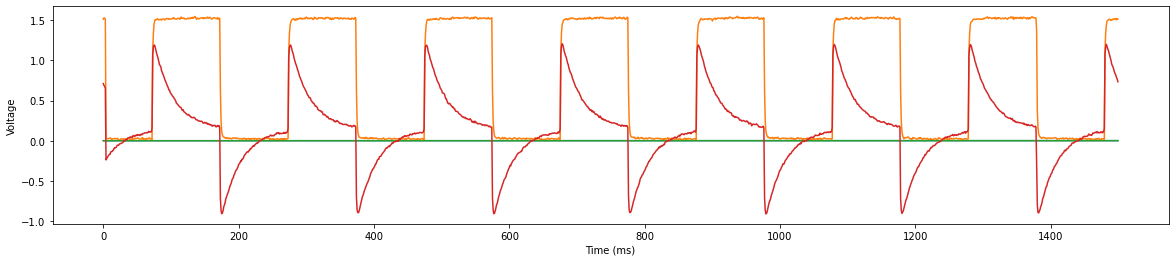

In [2]:
df = pd.read_csv('lab4-image1')
df

# increase the width to see clear chart 
plt.figure().set_figwidth(20)
plt.plot(df)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')

In [3]:
df

,t1,ch1,t2,ch2
0,-0.000375,1.512801,-0.000375,0.711286
1,-0.000374,1.529786,-0.000374,0.688367
2,-0.000374,1.524790,-0.000374,0.674417
3,-0.000373,1.516798,-0.000373,0.656480
4,-0.000373,0.032158,-0.000373,-0.239337
...,...,...,...,...
1495,0.000373,1.520794,0.000373,0.834847
1496,0.000373,1.517797,0.000373,0.814917
1497,0.000373,1.504809,0.000374,0.789009
1498,0.000374,1.518796,0.000374,0.768084


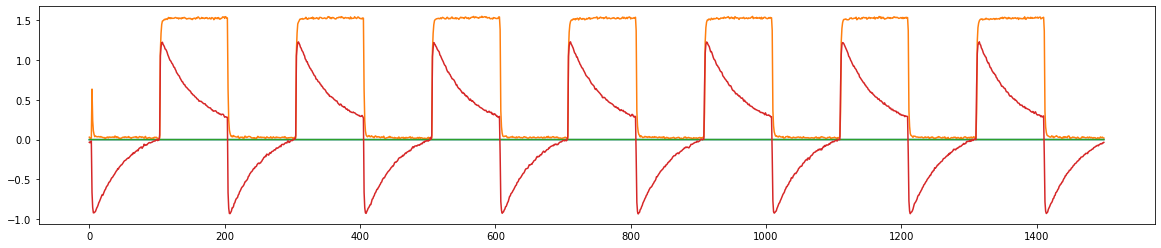

In [4]:
df2 = pd.read_csv('lab4-220')

plt.figure().set_figwidth(20)
plt.plot(df2)

In [5]:
df2

,t1,ch1,t2,ch2
0,-0.000375,0.030160,-0.000375,-0.034066
1,-0.000374,0.019170,-0.000374,-0.040045
2,-0.000374,0.008180,-0.000374,-0.024102
3,-0.000373,0.021168,-0.000373,-0.018123
4,-0.000373,0.633607,-0.000373,-0.663829
...,...,...,...,...
1495,0.000373,0.024165,0.000373,-0.052003
1496,0.000373,0.027163,0.000373,-0.054992
1497,0.000373,0.030160,0.000374,-0.042038
1498,0.000374,0.020169,0.000374,-0.043035


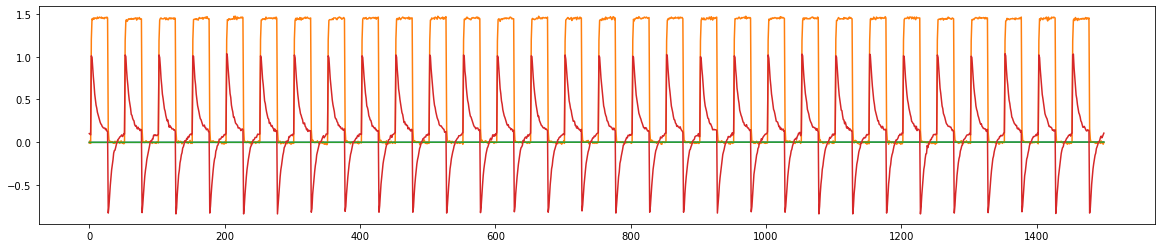

In [6]:
df3 = pd.read_csv('lab4-100pf')

plt.figure().set_figwidth(20)
plt.plot(df3)

In [7]:
df3

,t1,ch1,t2,ch2
0,-0.001502,-0.008736,-0.001502,0.101002
1,-0.001500,0.016223,-0.001500,0.096029
2,-0.001498,-0.013727,-0.001498,0.086084
3,-0.001496,1.204262,-0.001496,1.010947
4,-0.001494,1.443867,-0.001494,0.991058
...,...,...,...,...
1495,0.001488,0.016223,0.001488,0.071167
1496,0.001490,-0.008736,0.001490,0.051278
1497,0.001492,-0.003744,0.001492,0.066195
1498,0.001494,-0.023711,0.001494,0.086084


In [8]:
new_df = pd.merge(df[['ch2']], df2[['ch2']], left_index=True, right_index=True, suffixes=('_1', '_2'))
new_df = pd.merge(new_df, df3[['ch2']], left_index=True, right_index=True)
new_df.columns = ['df_ch2', 'df2_ch2', 'df3_ch2']
new_df

,df_ch2,df2_ch2,df3_ch2
0,0.711286,-0.034066,0.101002
1,0.688367,-0.040045,0.096029
2,0.674417,-0.024102,0.086084
3,0.656480,-0.018123,1.010947
4,-0.239337,-0.663829,0.991058
...,...,...,...
1495,0.834847,-0.052003,0.071167
1496,0.814917,-0.054992,0.051278
1497,0.789009,-0.042038,0.066195
1498,0.768084,-0.043035,0.086084


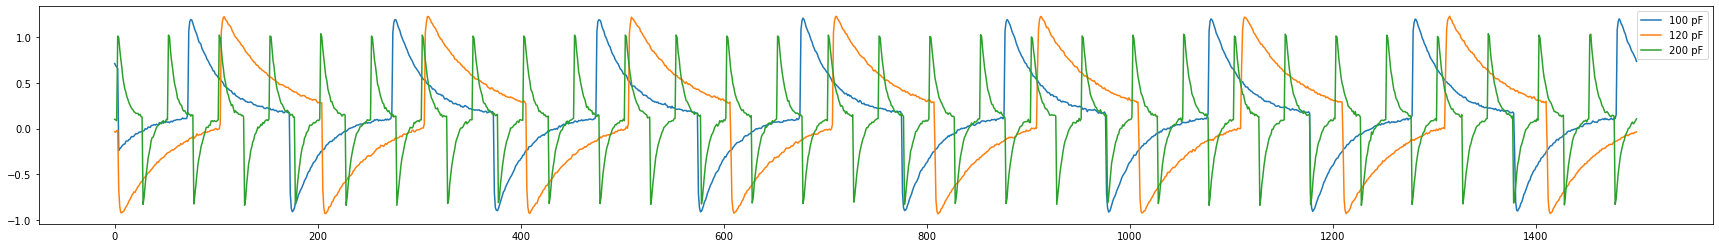

In [9]:
plt.figure().set_figwidth(30)
plt.plot(new_df)
plt.legend(['100 pF', '120 pF', '200 pF'], loc='best')

### Circuit calibration data and curve

**Caption:** A graph of calibration versus RMS of VOut, where the data shows a Voltage increase as Capacitance increases. This happens because at higher capacitance values, the time between charge-discharge is longer, creating a slope that increases to the length of the period (or near this). 

In [10]:
lab4_data = pd.read_excel('Lab4_Data.xlsx')
lab4_data

,Capacitance,RMS (measured)
0,100,385.3
1,120,434.4
2,150,462.9
3,180,512.7
4,220,553.5
5,270,582.2


Equation of the line of best fit: y = 1.15x + 289.85


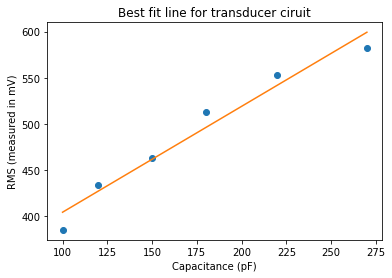

In [11]:
coeffs = np.polyfit(lab4_data['Capacitance'], lab4_data['RMS (measured)'], 1)
line = np.poly1d(coeffs)
#plt.plot(new_func)
plt.plot(lab4_data['Capacitance'], lab4_data['RMS (measured)'], 'o', lab4_data['Capacitance'], line(lab4_data['Capacitance']), '-')
plt.xlabel('Capacitance (pF)')
plt.ylabel('RMS (measured in mV)')
plt.title('Best fit line for transducer ciruit')
print("Equation of the line of best fit: y = {:.2f}x + {:.2f}".format(coeffs[0], coeffs[1]))

In [12]:
# x = (-289.85 + RMS(measured)) / (1.15)
new_func = (-289.85 + lab4_data['RMS (measured)']) / (1.15)
new_func

0     83.000000
1    125.695652
2    150.478261
3    193.782609
4    229.260870
5    254.217391
Name: RMS (measured), dtype: float64

In [13]:
# 520.8 is the mV value I collected from the O-scope
cap_val = (-289.85 + 520.8) / (1.15)
#cap_val = (-289.85 + 365.6) / (1.15)
cap_val

# cap_val represents the capacitor value I got as a result of my transfer function

200.8260869565217

In [14]:
# Capacitance at 55% Relative Humity (as seen on data sheet)
RH = 180
X = cap_val/RH # 1.11 was rounded value

# Calculate the reverse polynomial response of HS1101LF
measured_humidity = -3.4656 * 10**3 * 1.11 ** 3 + 1.0732 * 10 ** 4 * 1.11 ** 2 - 1.0457 * 10 ** 4 * 1.11 + 3.2459 * 10 ** 3
measured_humidity
#measured_humidity = -3.4656 * 10**3 * X ** 3 + 1.0732 * 10 ** 4 * X ** 2 - 1.0457 * 10 ** 4 * X + 3.2459 * 10 ** 3
#measured_humidity

121.8652063999998

### Reflections on relative humidity

I computed 121.86 as my measured humidity, a result I don't believe makes sense because the RH% of the room is 20% and the humidity outside is 68%. 

When I got this result I revisited my best fit line and table to see if there were any errors; the residuals for the line are small with no outlier values and I calculated more Capacitance values than recommended in the lab to increase my sample size (granted it was by 1) to reduce the chance of a large error. 

Next, I reviewed my transfer function math. The goal was to get compute the capacitance given the RMS (measured) value and this was done correctly. Lastly, I computed the measured humidity based on the data sheet formula. 

These results were checked with my measurement curve (on Notion) and they match. 

In terms of things that could've gone wrong, my resistor value could've been too high. Having a lower resistor value would've reduced my RMS (measured) as mentioned in the data sheet and after reviewing my analysis and having my breadboard confirmed, this seems like a good hypothesis for what went wrong. If I had more time, I could approve/disprove this hypothesis.

In [15]:
trying = pd.merge(new_func, lab4_data['Capacitance'], left_index = True, right_index = True)
trying

,RMS (measured),Capacitance
0,83.000000,100
1,125.695652,120
2,150.478261,150
3,193.782609,180
4,229.260870,220
5,254.217391,270


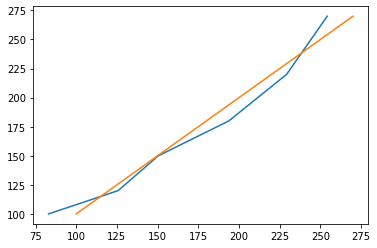

In [16]:
plt.plot(trying, lab4_data['Capacitance'])

### Calculating the % error (residual) for points on linear regression curve - Not graded

In [17]:
error_value = 1.15 * 150 + 289.85
error_value

462.35

In [18]:
#x_measured - x_known/x_known

x_measured = 462.35
x_known = 462.9

percentage_error = np.abs((x_measured - x_known)/x_known)
percentage_error

0.0011881615899761386

In [19]:
import pandas as pd
import numpy as np

# create a function to calculate the percentage error
def calc_percent_error(df, x_col, y_col, slope, intercept):
    # calculate predicted y values using the linear regression equation
    df['predicted'] = df[x_col] * slope + intercept
    
    # calculate percent error for each value
    df['percent_error'] = np.abs(df[y_col] - df['predicted']) / df[y_col] * 100
    
    return df

# create a sample dataframe with capacitance and RMS values
df = pd.DataFrame({'capacitance': [100, 120, 150, 180, 220, 270], 'RMS': [385.3, 434.4, 462.9, 512.7, 553.5, 582.2]})

# set the linear regression equation coefficients
slope = 1.15
intercept = 289.85

# calculate the percentage error for the sample data
result_df = calc_percent_error(df, 'capacitance', 'RMS', slope, intercept)

# print the dataframe with percent errors
print(result_df)

# calculate and print the mean percent error
mean_percent_error = result_df['percent_error'].mean()
print('Mean percent error: {:.2f}%'.format(mean_percent_error))

   capacitance    RMS  predicted  percent_error
0          100  385.3     404.85       5.073968
1          120  434.4     427.85       1.507827
2          150  462.9     462.35       0.118816
3          180  512.7     496.85       3.091476
4          220  553.5     542.85       1.924119
5          270  582.2     600.35       3.117485
Mean percent error: 2.47%
